In [1]:
import pandas as pd

In [2]:
db_data = pd.read_csv("uniprotlinks.csv")

In [3]:
unip_data = pd.read_csv("uniprot-all2.csv")

In [4]:
df = db_data.rename(columns={'Name': 'Drug Name', 'UniProt Name': 'Protein Name'})

In [5]:
df_2 = unip_data.rename(columns={'Entry': 'UniProt ID', 'Protein names': 'Protein Name', 'Gene names': 'Gene Symbol'})

In [6]:
df.shape

(16168, 5)

In [7]:
df_2.shape

(159552, 4)

In [8]:
##Chaning the type of column "Gene Symbol" to list. 

Gene_sym = df_2["Gene Symbol"].tolist()

In [9]:
what_i_want = []

In [10]:
##Splitting data into list of lists using space delimiter. 

for id_ in Gene_sym:
    temp = str(id_).split(' ')
    what_i_want.append(temp)
    

In [11]:
#Trimming off Gene Symbol Aliases 

what_i_actually_want = [id_pair[0] for id_pair in what_i_want]  ##list comprehensions 

In [12]:
print(type(what_i_actually_want))

<class 'list'>


In [13]:
s = pd.Series(what_i_actually_want)  ##turning the list of values into a series.

In [14]:
df_2['Gene Symbol'] = s.values   ##adding that series to the dataframe. 

In [15]:
print(df_2.head())

  UniProt ID Gene Symbol  Length  \
0     Q13542    EIF4EBP2     120   
1     Q5TYW2   ANKRD20A1     823   
2     A0PJZ0  ANKRD20A5P     165   
3     A7E2S9   ANKRD30BL     258   
4     P29275     ADORA2B     332   

                                        Protein Name  
0  Eukaryotic translation initiation factor 4E-bi...  
1      Ankyrin repeat domain-containing protein 20A1  
2  Putative ankyrin repeat domain-containing prot...  
3  Putative ankyrin repeat domain-containing prot...  
4                             Adenosine receptor A2b  


In [16]:
##Using merge to merge two dataframes and map the UniProt Id to Gene Symbol. 

combined_df = db_data.merge(df_2, how="left")

In [17]:
##rename 'Name' column in combined_df to 'Drug Name' and 'Type' column to 'Drug Type'.

combined_df2 = combined_df.rename(columns={'Name': 'Drug Name', 'Type': 'Drug Type', 'UniProt Name': 'Protein Names'})

In [18]:
##deleting 'Protein Name' column because it's the same as 'Protein Names' column. 

del combined_df2["Protein Name"]

In [19]:
#exporting the dataframe to csv file. 

"""combined_df2.to_csv('drug_gene.csv')"""

"combined_df2.to_csv('drug_gene.csv')"

In [20]:
#selecting only the columns you want and combining them into a new column as a tuple in combined_df2.

combined_df2['drug_gene'] = list(zip(combined_df2['Drug Name'], combined_df2['Gene Symbol']))

In [21]:
drug_gene_col = combined_df2["drug_gene"]

In [22]:
print(drug_gene_col.head())

0        (Lepirudin, F2)
1      (Cetuximab, EGFR)
2    (Cetuximab, FCGR3B)
3       (Cetuximab, C1R)
4      (Cetuximab, C1QA)
Name: drug_gene, dtype: object


In [23]:
import networkx as nx

In [24]:
import matplotlib.pyplot as plt

In [25]:
import numpy as np

In [26]:
from networkx.algorithms import bipartite 

In [27]:
##G=nx.read_edgelist(drug_gene_col, delimiter=',', nodetype=str)  ##'tuple' object has no attribute 'decode' error

In [28]:
##Use this script to avoid error message by networkx. 

##nx.draw_networkx(G)      

In [29]:
drug_gene_col[455]

('Pyridoxal Phosphate', 'AGXT2')

In [30]:
##Turning the tuple list column named 'drug_gene' into a dictionary quick and easy way! 
##Turns out I don't need to do this. 

#dict_ = dict(combined_df2['drug_gene'])

In [31]:
gene_sym = combined_df2["Gene Symbol"]

In [32]:
gene_sym_isnull = pd.isnull(gene_sym)

In [33]:
gene_sym_nulltrue = gene_sym[gene_sym_isnull]

In [34]:
print(len(gene_sym_nulltrue))

4140


In [35]:
gene_sym_nullfalse = gene_sym[gene_sym_isnull == False]

In [36]:
gene_sym_nullfalse.shape

(12028,)

In [37]:
##Dropping rows with empty columns in Gene Symbol. 

combined_df2.dropna(subset=['Gene Symbol'], inplace=True)

In [38]:
combined_df2.shape

(12028, 8)

In [39]:
G = nx.Graph()

In [40]:
##Turning the tuples column 'drug_gene' to lists. 

edges = combined_df2["drug_gene"].tolist()

In [41]:
G.add_edges_from(edges)

In [42]:
G.edges()

[('Lepirudin', 'F2'),
 ('F2', 'Bivalirudin'),
 ('F2', 'Drotrecogin alfa'),
 ('F2', 'Coagulation Factor IX (Recombinant)'),
 ('F2', 'Menadione'),
 ('F2', 'Argatroban'),
 ('F2', 'Proflavine'),
 ('F2', 'Beta-(2-Naphthyl)-Alanine'),
 ('F2', 'Hemi-Babim'),
 ('F2', '2-(2-Hydroxy-Phenyl)-1h-Benzoimidazole-5-Carboxamidine'),
 ('F2',
  '4-Oxo-2-Phenylmethanesulfonyl-Octahydro-Pyrrolo[1,2-a]Pyrazine-6-Carboxylic Acid [1-(N-Hydroxycarbamimidoyl)-Piperidin-4-Ylmethyl]-Amide'),
 ('F2', '4-Iodobenzo[B]Thiophene-2-Carboxamidine'),
 ('F2', 'CRA_8696'),
 ('F2', 'Gamma-Carboxy-Glutamic Acid'),
 ('F2', '6-Chloro-2-(2-Hydroxy-Biphenyl-3-Yl)-1h-Indole-5-Carboxamidine'),
 ('F2', 'Lysophosphotidylserine'),
 ('F2',
  'N-{2,2-DIFLUORO-2-[(2R)-PIPERIDIN-2-YL]ETHYL}-2-[2-(1H-1,2,4-TRIAZOL-1-YL)BENZYL][1,3]OXAZOLO[4,5-C]PYRIDIN-4-AMINE'),
 ('F2',
  'TRANS-4-(GUANIDINOMETHYL)-CYCLOHEXANE-L-YL-D-3-CYCLOHEXYLALANYL-L-AZETIDINE-2-YL-D-TYROSINYL-L-HOMOARGININAMIDE'),
 ('F2',
  '2-(3-CHLORO-6-{[2,2-DIFLUORO-2-(1-OXIDOP

In [43]:
##finding the degree of each nodes (both drugs and genes)

degree_distribution = G.degree()

In [44]:
len(degree_distribution.keys())

7191

In [45]:
%matplotlib inline

In [46]:
#plt.bar(list(degree_distribution.keys()), degree_distribution.values(), color='r')

#results in: unsupported operand type(s) for -: 'str' and 'float'


In [47]:
from numpy import arange

In [48]:
unique = len(set(degree_distribution.values()))
print(unique)

74


In [49]:
B = nx.Graph()

In [50]:
B.add_nodes_from(combined_df2['Drug Name'], bipartite=0)

In [51]:
B.add_nodes_from(combined_df2['Gene Symbol'], bipartite=1)

In [52]:
B.add_edges_from([(row['Drug Name'], row['Gene Symbol']) for idx, row in combined_df2.iterrows()])

In [53]:
edgelist = B.edges()

In [54]:
nx.is_connected(B)

False

In [55]:
#separating the two sets of nodes, drugs and genes. 

d, g = bipartite.sets(B)

In [56]:
#list(d)                """to display drugs"""

In [57]:
len(d)

4923

In [58]:
#list(g)                   """to display genes"""

In [59]:
len(g)

2268

In [60]:
len(set(combined_df2['Gene Symbol']))

2268

In [61]:
len(set(combined_df2['Drug Name']))

4923

In [62]:
##combined degree distribution of bipartite graph B.

degree_distribution2 = B.degree()

In [63]:
c = bipartite.clustering(B)             #clustering coefficient

In [64]:
avg_c = bipartite.average_clustering(B)                          #average clustering coeff

In [65]:
avg_c

0.4761818878468815

In [66]:
#top_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
#bottom_nodes = set(B) - top_nodes

In [67]:
array1 = np.array(list(g))

In [68]:
#changing the set of drugs to numpy arrays

array2 = np.asarray(list(d))                                

In [69]:
#projection of B graph onto drug_nodes

d_nodes = bipartite.projected_graph(B, d)                     

In [70]:
g_nodes = bipartite.projected_graph(B, g)                     

In [71]:
##degree distribution of genes nodes only

genes_degree = g_nodes.degree()               

In [72]:
##degree distribution of drugs nodes only

drugs_degree = d_nodes.degree()

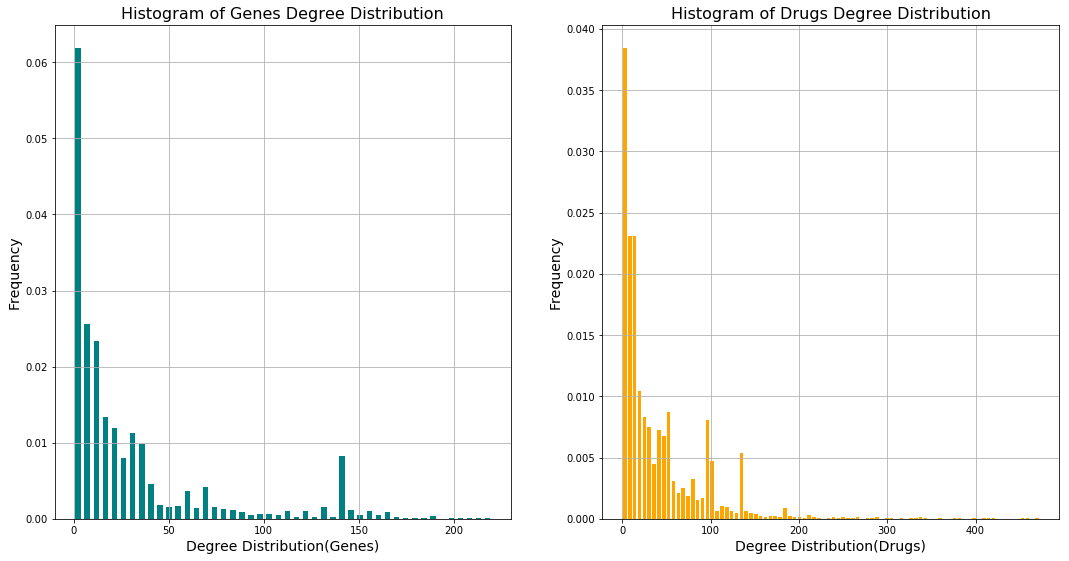

In [80]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
degrees1 = [item[1] for item in list(genes_degree.items())]      ##genes
degrees2 = [item[1] for item in list(drugs_degree.items())]    ##drugs

#ax1.set_ylim(0,0.1)
ax1.set_xlabel('Degree Distribution(Genes)', size=14)
ax1.set_ylabel('Frequency', size=14)
ax1.set_title('Histogram of Genes Degree Distribution', size=16)
ax1.hist(degrees1, bins='auto', color='teal', rwidth=0.6, normed=1)


#ax2.set_ylim(0,0.1)
ax2.set_xlabel('Degree Distribution(Drugs)', size=14)
ax2.set_ylabel('Frequency', size=14)
ax2.set_title('Histogram of Drugs Degree Distribution', size=16)
ax2.hist(degrees2, bins='auto', color='orange', rwidth=0.6, normed=1, width=4)

ax1.grid(True)
ax2.grid(True)
plt.show()

#bins=range(min(degrees1), max(degrees1)

In [74]:
##finding corresponding max. value key in a dict. 

max(degree_distribution2, key=degree_distribution2.get)                 

'NADH'

In [75]:
degree_distribution2['NADH']

144

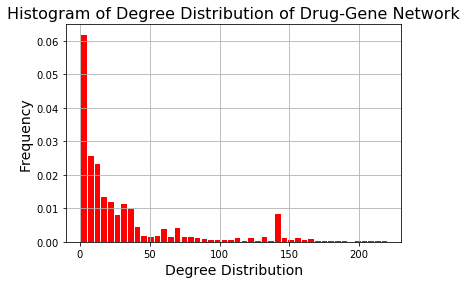

In [76]:
plt.xlabel('Drugs')
plt.ylabel('Degree')
plt.title('Histogram of Drugs showing Degree')

#labels = [item[0] for item in list(dd2.items())]
degrees = [item[1] for item in list(degree_distribution2.items())]

#plt.ylim(0,0.07)
plt.xlabel('Degree Distribution', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Histogram of Degree Distribution of Drug-Gene Network', size=16)
plt.hist(degrees1, bins='auto', color='red', rwidth=0.6, normed=1, width=4)
plt.grid(True)

plt.show()

#normed=1 :normalized so that integral over the range is 1.  